## Step 1: Import Libraries

In [166]:
# All imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [131]:
# List all the files
for dir_name, _, file_names in os.walk('data'):
    for file_name in file_names:
        print(os.path.join(dir_name, file_name))

data/vauxhall.csv
data/bmw.csv
data/unclean cclass.csv
data/vw.csv
data/hyundi.csv
data/audi.csv
data/unclean focus.csv
data/toyota.csv
data/ford.csv
data/focus.csv
data/skoda.csv
data/cclass.csv
data/merc.csv


## Step 2: Reading the Data

In [132]:
data_vw = pd.read_csv("data/vw.csv")

In [133]:
data_vw.shape

(15157, 9)

In [134]:
data_vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [135]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


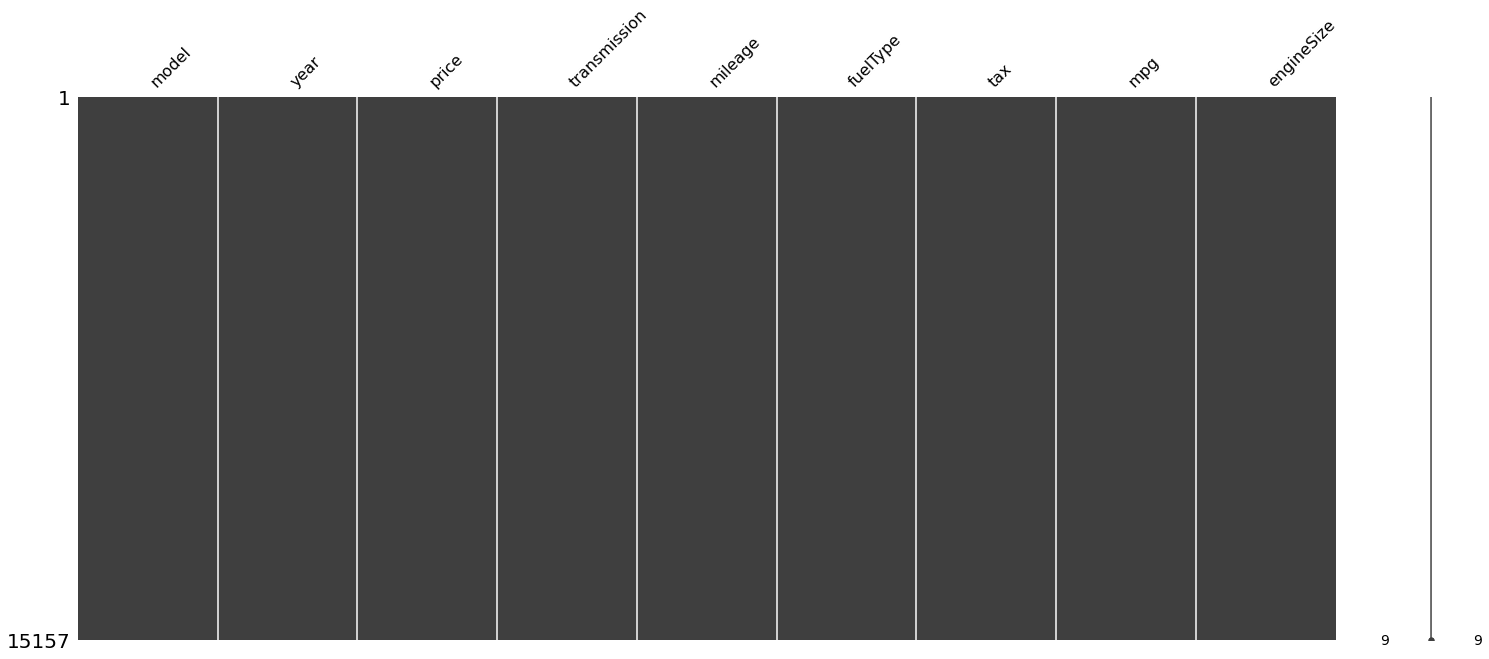

In [136]:
missingno.matrix(data_vw)

In [137]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Step 3: EDA

In [138]:
categorical_features = [feature for feature in data_vw.columns if data_vw[feature].dtype == 'O']

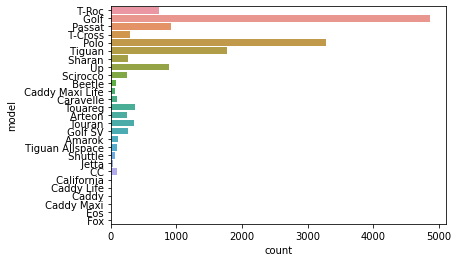

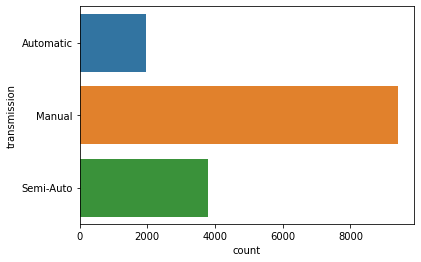

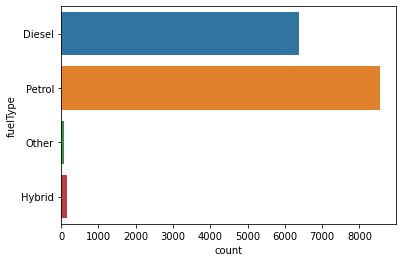

In [139]:
# Getting the count plot
for feature in categorical_features:
    sns.countplot(y=data_vw[feature])
    plt.show()

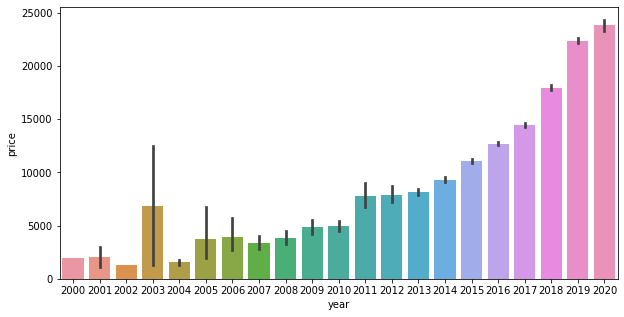

In [140]:
# Getting the barplot
plt.figure(figsize=(10,5), facecolor='w')
sns.barplot(x=data_vw['year'], y=data_vw['price'])

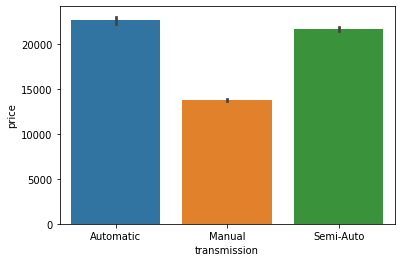

In [141]:
sns.barplot(x=data_vw['transmission'], y=data_vw['price'])

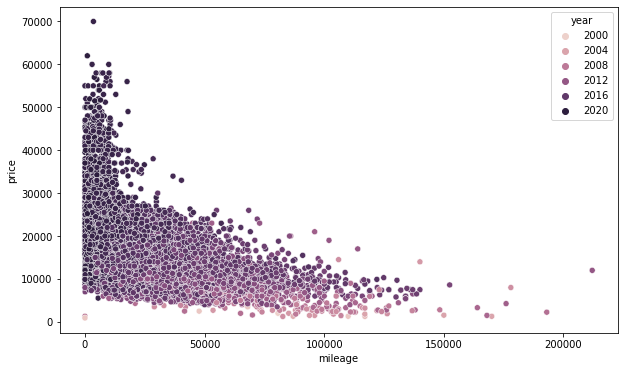

In [142]:
# Getting the relation b/w milleage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_vw['mileage'], y=data_vw['price'], hue=data_vw['year'])

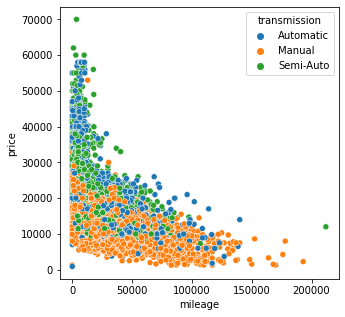

In [143]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data_vw['mileage'], y=data_vw['price'], hue=data_vw['transmission'])

<Figure size 720x720 with 0 Axes>

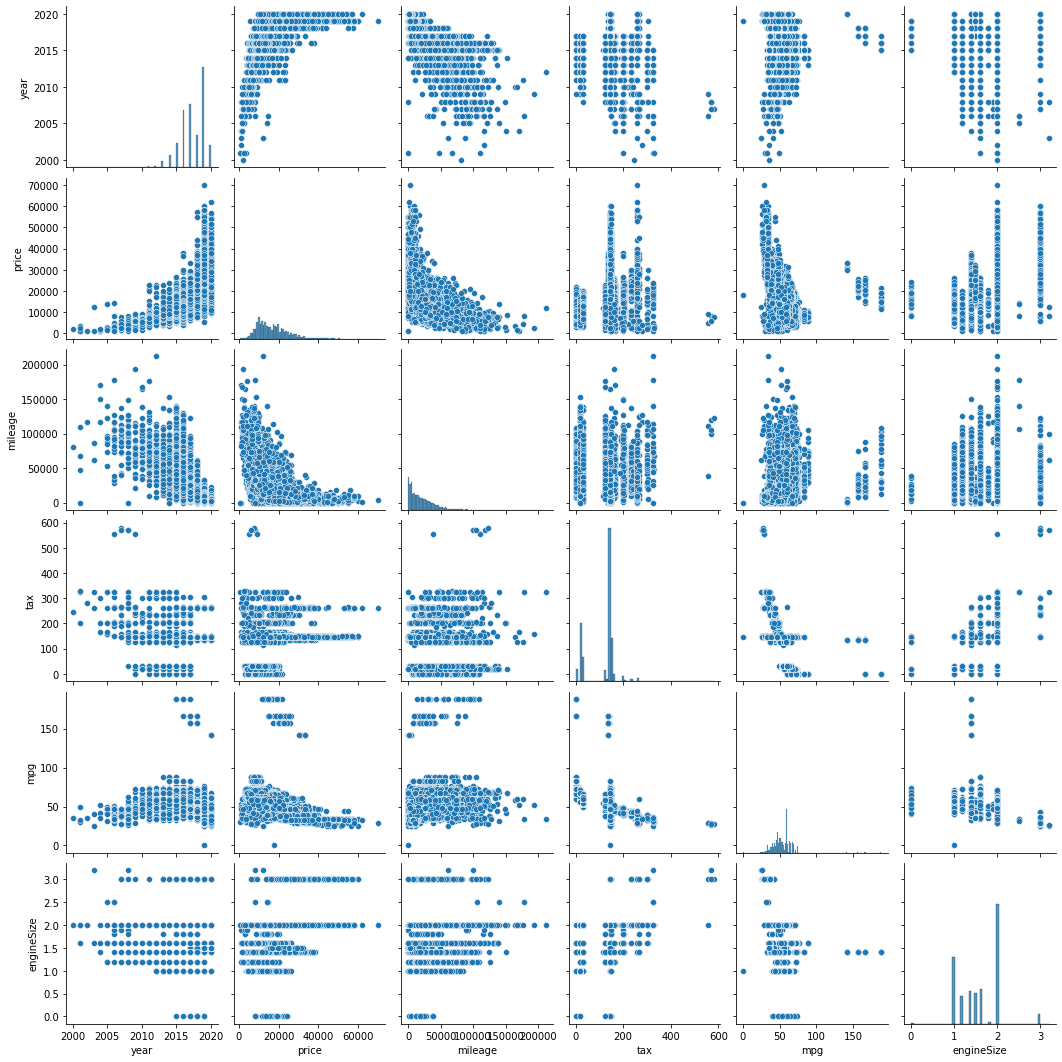

In [144]:
plt.figure(figsize=(10,10))
sns.pairplot(data_vw)

## Step 4: Feature Engineering

In [145]:
data_vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Dropping the year column, but instead will create data on how old the car is

In [146]:
data_vw['age_of_car'] = 2020 - data_vw['year']

In [147]:
data_vw.drop(['year'], axis=1, inplace=True)

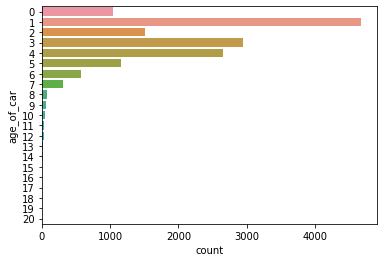

In [148]:
# Look at the frequency of the ages
sns.countplot(y=data_vw['age_of_car'])

In [149]:
# OHE the categorical variables
data_vw_extended = pd.get_dummies(data_vw)

In [150]:
data_vw_extended.shape

(15157, 40)

In [151]:
sc = StandardScaler()

In [152]:
data_vw_extended = pd.DataFrame(sc.fit_transform(data_vw_extended), columns=data_vw_extended.columns)

In [153]:
data_vw_extended.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [154]:
X_train, X_test, y_train, y_test = train_test_split(data_vw_extended.drop(['price'], axis=1), data_vw_extended[['price']])

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11367, 39), (3790, 39), (11367, 1), (3790, 1))

## Step 5: Feature Selection

In [156]:
# Select the k best features
no_of_features = []
r_2_train = []
r_2_test = []

In [157]:
for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k=k)
    X_train_selector = selector.fit_transform(X_train, y_train)
    X_test_selector = selector.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_selector, y_train)
    
    no_of_features.append(k)
    r_2_train.append(lin_reg.score(X_train_selector, y_train))
    r_2_test.append(lin_reg.score(X_test_selector, y_test))

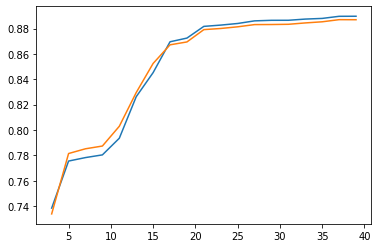

In [158]:
sns.lineplot(x=no_of_features, y=r_2_train)
sns.lineplot(x=no_of_features, y=r_2_test)

k=23 is providing us the best optimal result. Hence training the model on 23

In [159]:
selector = SelectKBest(f_regression, k=23)
X_train_selector = selector.fit_transform(X_train, y_train)
X_test_selector = selector.transform(X_test)

In [160]:
column_name = data_vw_extended.drop(['price'], axis=1).columns
column_name[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

## Step 6: Model

In [163]:
def regressor_builder(model):
    regressor = model
    regressor.fit(X_train_selector, y_train)
    score = regressor.score(X_test_selector, y_test)
    return regressor, score

In [168]:
list_models = [LinearRegression(), Lasso(), Ridge(), SVR(), RandomForestRegressor(), MLPRegressor()]

In [173]:
model_performance = pd.DataFrame(columns=['Features', 'Model', 'Performance'])

In [176]:
for model in list_models:
    regressor, score = regressor_builder(model)
    model_performance = model_performance.append({"Feature": "Linear", "Model": regressor, "Performance": score}, ignore_index=True)

In [177]:
model_performance

,Features,Model,Performance,Feature
0,NaN,LinearRegression(),0.880023,Linear
1,NaN,Lasso(),-0.000053,Linear
2,NaN,Ridge(),0.880023,Linear
3,NaN,SVR(),0.936693,Linear
4,NaN,"(DecisionTreeRegressor(max_features='auto', ra...",0.951218,Linear
5,NaN,MLPRegressor(),0.940426,Linear


Randomforest provides the best r^2